## Assignment 8
----

### Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt

### Functions / Classes
-----

In [56]:
def V(u):
    x,y = u
    return (x-y-1)**4 +abs(x+y-6)

def rho(u):
    x,y = u
    V = (x-y-1)**4 +abs(x+y-6)
    return np.exp(-V)

def prop_dist(u, Kq):
    return np.random.multivariate_normal(u, Kq)

def MCMC(M, a, start=(0,0)):
    # covariance matrix
    Kq = [[a,0],[0,a]]

    # start poss
    u_curr = start

    # list for samples
    samples = [u_curr]
    # step count
    N = 1
    # accepted sample count
    N_samples = 1
    # continue untill wanted number of samples
    while N_samples < M:
        # new proposal point
        prop = prop_dist(u_curr, Kq)
        # log of ratio rho(prop)/rho(u_curr)
        ratio = V(u_curr) - V(prop)
        # log of accept prob
        accept_prob = min(0, ratio)

        # see if we accept new point
        if np.log(np.random.rand()) < accept_prob:
            # add new sample point
            samples.append(prop)
            # change current state of MC
            u_curr = prop

            N_samples += 1
            
        N += 1

    return samples, N,

In [77]:
M = 10000
sample, N = MCMC(M, 1.12)

accept_ratio = M/N

print(accept_ratio)

0.309033035631509


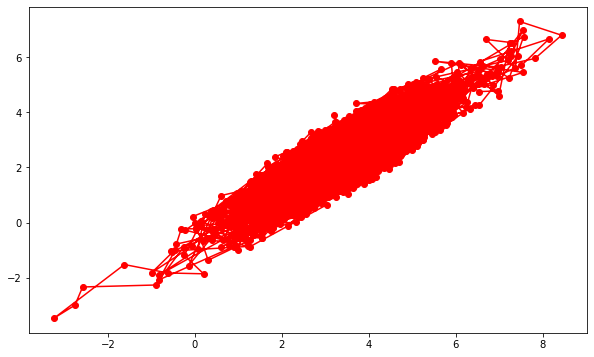

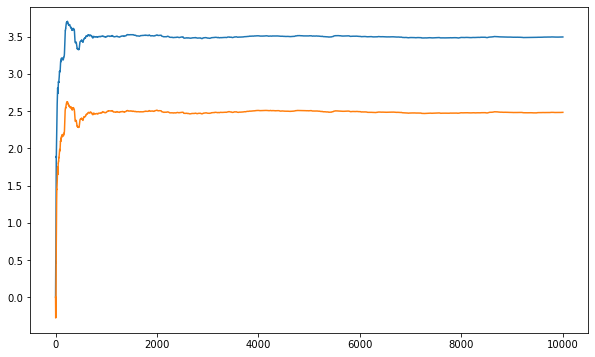

In [78]:
x,y = zip(*sample)
running_mean_x = [np.mean(x[:n]) for n in range(1,M+1)]
running_mean_y = [np.mean(y[:n]) for n in range(1,M+1)]

plt.figure(figsize=(10,6));

plt.plot(x,y, 'r-', marker='o');

plt.figure(figsize=(10,6))
plt.plot(running_mean_x);
plt.plot(running_mean_y);